# Read in Json

In [111]:
# import essential libraries
import pandas as pd
import os
import json
import glob

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# get file paths
def get_file(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root, '*.json'))
        for f in files:
            all_files.append(os.path.abspath(f))
    return all_files

In [48]:
# get filepaths
data = get_file('./sample_data/')

In [49]:
# data = list of filepath
data

['/Users/williambaldridge/codeup-data-science/Brad-file/sample_data/2038743015029195761.json',
 '/Users/williambaldridge/codeup-data-science/Brad-file/sample_data/2038881753537300577.json',
 '/Users/williambaldridge/codeup-data-science/Brad-file/sample_data/2038768026183987076.json',
 '/Users/williambaldridge/codeup-data-science/Brad-file/sample_data/2038755041623476989.json',
 '/Users/williambaldridge/codeup-data-science/Brad-file/sample_data/2038762498183656777.json',
 '/Users/williambaldridge/codeup-data-science/Brad-file/sample_data/2038729813423045876.json',
 '/Users/williambaldridge/codeup-data-science/Brad-file/sample_data/2038869192283022835.json']

In [50]:
# open 1 file
f = open(data[0], "r")

In [51]:
# load one file
ig = json.loads(f.read())

In [52]:
# check data structure
ig

{'__typename': 'GraphImage',
 'comments_disabled': False,
 'dimensions': {'height': 1350, 'width': 1080},
 'display_url': 'https://scontent-lax3-1.cdninstagram.com/vp/3882038d3dfd8c0a63fe1a802232f59e/5D65F788/t51.2885-15/e35/p1080x1080/59654524_1240891809402199_6418913412781417396_n.jpg?_nc_ht=scontent-lax3-1.cdninstagram.com',
 'edge_media_preview_like': {'count': 1083},
 'edge_media_to_caption': {'edges': [{'node': {'text': '“Believe in Pink” - Audrey Hepburn 💗I am always so appalled by people who don’t want to do anything with the color pink anymore, makes them less powerful, less vocal, less of a feminist?? It’s a color, believe in it, believe in yourself and not what it defines of you!! Don’t over do but don’t give up on it 💗💗\n.\n.\n.\nThis dress is Instagram favorite and I picked the prettiest pink, linked in bio! Or copy https://rstyle.me/cz-n/dhbzfycff4x\nhttp://liketk.it/2BFdi #liketkit @liketoknow.it \nIt is available in 10 beautiful colors .\n#liketkit #liketoknowit #lovepi

In [8]:
# check keys
ig.keys()

dict_keys(['__typename', 'comments_disabled', 'dimensions', 'display_url', 'edge_media_preview_like', 'edge_media_to_caption', 'edge_media_to_comment', 'gating_info', 'id', 'is_video', 'media_preview', 'owner', 'shortcode', 'taken_at_timestamp', 'thumbnail_resources', 'thumbnail_src'])

#### Like count

In [53]:
# post like count
ig['edge_media_preview_like']['count']

1083

#### Comment disabled

In [30]:
ig['comments_disabled']

False

#### Comment count

In [14]:
ig['edge_media_to_comment']['count']

7

#### Caption

In [18]:
ig['edge_media_to_caption']['edges'][0]['node']['text']

'By @rowanrow'

#### Owner ID

In [19]:
ig['id']

'2038700089312506854'

#### Is video?

In [21]:
ig['is_video']

False

#### Timestamp

In [20]:
ig['taken_at_timestamp']

1557252010

## Data Extraction

In [58]:
# get file paths
def get_file(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root, '*.json'))
        for f in files:
            all_files.append(os.path.abspath(f))
    return all_files

data = get_file('./instagram_data/')

# extract data
list_of_json = []
for i in range(0, len(data)):
    f = open(data[i], "r")
    ig = json.loads(f.read())
    stats = {}
    # id
    stats['id'] = ig['id']
    
    # owner id
    stats['owner_id'] = ig['owner']['id']
    
    # is video
    stats['is_video'] = ig['is_video']
    
    # timestamp
    stats['timestamp'] = ig['taken_at_timestamp']
    
    # caption
    if len(ig['edge_media_to_caption']['edges'])>=1:
        stats['caption'] = ig['edge_media_to_caption']['edges'][0]['node']['text']
    else:
        stats['caption'] = 'N/A'
    # like count
    stats['like_count'] = ig['edge_media_preview_like']['count']
    
    # comment disabled
    stats['comment_disabled'] = ig['comments_disabled']
    
    # comment count
    stats['comment_count'] = ig['edge_media_to_comment']['count']
    
    # add dic to list
    list_of_json.append(stats)
    

In [59]:
len(list_of_json)

1528940

In [60]:
df = pd.DataFrame(list_of_json)

In [84]:
df.head()

,id,owner_id,is_video,timestamp,caption,like_count,comment_disabled,comment_count,date
0,1806152222745907348,50884856,False,1529530145,Follow the movement and get my EP #MYEX on @it...,1160,False,0,2018-06-20 16:29:05-05:00
1,1778527492682732179,14446047,False,1526237020,These sunnies are going to be my summer favs! ...,172,False,11,2018-05-13 13:43:40-05:00
2,1913545990682512895,299170460,False,1542332479,What do you think of these #glasses that I got...,20,False,1,2018-11-15 19:41:19-06:00
3,2002372113614057905,2217874,False,1552921378,Fancy for the night 💵 @fashionnovacurve .\n.\n...,3416,False,40,2019-03-18 10:02:58-05:00
4,1735701272014031432,1487840452,False,1521131737,Staying cozy wearing @tartecosmetics eyeshadow...,143,False,4,2018-03-15 11:35:37-05:00


In [69]:
df.to_csv('instagram_data.csv')

In [75]:
df.to_excel('instagram_data.xlsx')

ValueError: This sheet is too large! Your sheet size is: 1528940, 9 Max sheet size is: 1048576, 16384

In [70]:
df.shape

(1528940, 8)

In [63]:
df.head()

,id,owner_id,is_video,timestamp,caption,like_count,comment_disabled,comment_count
0,1806152222745907348,50884856,False,1529530145,Follow the movement and get my EP #MYEX on @it...,1160,False,0
1,1778527492682732179,14446047,False,1526237020,These sunnies are going to be my summer favs! ...,172,False,11
2,1913545990682512895,299170460,False,1542332479,What do you think of these #glasses that I got...,20,False,1
3,2002372113614057905,2217874,False,1552921378,Fancy for the night 💵 @fashionnovacurve .\n.\n...,3416,False,40
4,1735701272014031432,1487840452,False,1521131737,Staying cozy wearing @tartecosmetics eyeshadow...,143,False,4


In [65]:
# set display format
pd.options.display.float_format = '{:.2f}'.format

In [66]:
df.like_count.describe()

count   1528940.00
mean       4396.04
std       41231.27
min           0.00
25%         222.00
50%         675.00
75%        1916.00
max     7309044.00
Name: like_count, dtype: float64

In [67]:
df.comment_count.describe()

count   1528940.00
mean         83.28
std        1098.04
min           0.00
25%           8.00
50%          27.00
75%          66.00
max      675587.00
Name: comment_count, dtype: float64

In [68]:
df.isnull().sum()

id                  0
owner_id            0
is_video            0
timestamp           0
caption             0
like_count          0
comment_disabled    0
comment_count       0
dtype: int64

In [71]:
# convert epoch time
df['date'] = (pd.to_datetime(df['timestamp'], unit='s')
                     .dt.tz_localize('utc')
                     .dt.tz_convert('US/Central'))

In [90]:
df['date'].dtype

datetime64[ns, US/Central]

In [91]:
df['date'] = df['date'].astype(str)

In [93]:
df['date'] = df['date'].str.slice(0,10)

In [95]:
df.date = pd.to_datetime(df.date)

In [98]:
df.head()

,id,owner_id,is_video,timestamp,caption,like_count,comment_disabled,comment_count,date
0,1806152222745907348,50884856,False,1529530145,Follow the movement and get my EP #MYEX on @it...,1160,False,0,2018-06-20
1,1778527492682732179,14446047,False,1526237020,These sunnies are going to be my summer favs! ...,172,False,11,2018-05-13
2,1913545990682512895,299170460,False,1542332479,What do you think of these #glasses that I got...,20,False,1,2018-11-15
3,2002372113614057905,2217874,False,1552921378,Fancy for the night 💵 @fashionnovacurve .\n.\n...,3416,False,40,2019-03-18
4,1735701272014031432,1487840452,False,1521131737,Staying cozy wearing @tartecosmetics eyeshadow...,143,False,4,2018-03-15


In [77]:
df.owner_id.nunique()

38043

In [80]:
df[df.date<'2018-01-01'].shape

(226208, 9)

In [81]:
df[df.date>'2019-01-01'].shape

(308068, 9)

In [83]:
df[df.date>'2019-01-01'].owner_id.nunique()

25550

In [82]:
df.date.max()

Timestamp('2019-05-07 19:01:07-0500', tz='US/Central')

#### Extracting 2018-2019 data

In [130]:
stats = pd.DataFrame({'Trending Content Avg. Engagement': [11237882,1790364,10414], 'Platform': ['Tiktok', 'YouTube', 'Instagram']})

In [131]:
stats

,Trending Content Avg. Engagement,Platform
0,11237882,Tiktok
1,1790364,YouTube
2,10414,Instagram


In [129]:
df[df['like_count']>1000].like_count.describe()

count    614232.00
mean      10414.57
std       64583.39
min        1001.00
25%        1479.00
50%        2540.00
75%        5801.00
max     7309044.00
Name: like_count, dtype: float64

In [133]:
df[df['like_count']>1000].comment_count.describe()

count   614232.00
mean       168.84
std       1727.37
min          0.00
25%         32.00
50%         64.00
75%        126.00
max     675587.00
Name: comment_count, dtype: float64

In [87]:
df_2018 = df[(df.date<'2019-05-08') & (df.date>'2018-05-07')]

In [97]:
df_2018.shape

(1069810, 9)

In [89]:
df_2018.to_csv('instagram_2018_2019.csv')

***

In [101]:
sample_df = df.sample(10000)

In [102]:
sample_df.head()

,id,owner_id,is_video,timestamp,caption,like_count,comment_disabled,comment_count,date
1063510,1743713584792647348,13597003,False,1522086879,"Leggings, but make it fashion 😂 with a cute bo...",82,False,7,2018-03-26
579791,1393212200659531833,419028247,False,1480303858,There has been photos taken of this place from...,1862,False,86,2016-11-27
168207,1918539768637855521,1546775036,False,1542927784,Wishing everyone a Happy Thanksgiving ☺️ | sho...,1000,False,39,2018-11-22
1436588,1714066524867087581,184244920,False,1518552674,Happy Pancake Day! 🥞💗 This is one of my favour...,298,False,5,2018-02-13
1449534,1895237795188669079,2132982216,False,1540149972,@rewearflohmarkt 💃🏼\nSo much fun 😃 heute auf u...,955,False,40,2018-10-21


In [103]:
sample_df.like_count.describe()

count     10000.00
mean       4924.77
std       40622.03
min           0.00
25%         226.00
50%         701.00
75%        1952.00
max     1688530.00
Name: like_count, dtype: float64

**NOTE: Significantly lower than TikTok**

In [104]:
sample_df.comment_count.describe()

count   10000.00
mean       86.02
std       586.04
min         0.00
25%         8.00
50%        27.00
75%        67.00
max     35118.00
Name: comment_count, dtype: float64

In [107]:
sample_df.set_index("date", inplace = True)

In [108]:
sample_df.sort_index(inplace = True)

In [124]:
resample = sample_df.resample('w')['like_count', 'comment_count'].sum()

<AxesSubplot:xlabel='date'>

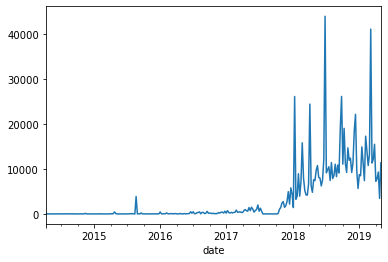

In [126]:
resample.comment_count.plot()

<AxesSubplot:xlabel='date'>

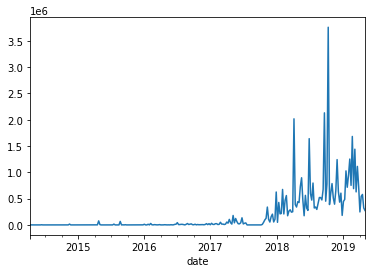

In [127]:
resample.like_count.plot()